In [ ]:
# 📘 Churn Prediction for ConnectSphere Telecom
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [ ]:
# 📌 Step 1: Install dependencies (if needed)
!pip install tensorflow pandas scikit-learn --quiet


In [ ]:
# 📌 Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
import pandas as pd

# Load your uploaded dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.shape)
print(df.columns)


(7032, 31)
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
print(df.columns.tolist())


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Load your uploaded dataset
# Assuming the uploaded file name is 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop customerID (not useful for prediction)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (it contains some blanks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical columns using one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6962 - loss: 0.5652 - val_accuracy: 0.7947 - val_loss: 0.4280
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7871 - loss: 0.4413 - val_accuracy: 0.7991 - val_loss: 0.4153
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8034 - loss: 0.4211 - val_accuracy: 0.8080 - val_loss: 0.4068
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7928 - loss: 0.4285 - val_accuracy: 0.8080 - val_loss: 0.4044
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4052 - val_accuracy: 0.8107 - val_loss: 0.4044
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8183 - loss: 0.3970 - val_accuracy: 0.8133 - val_loss: 0.4023
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8091 - loss: 0.4024 - val_accuracy: 0.8151 - val_loss: 0.4023
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.4052 - val_accuracy: 0.8133 - val_

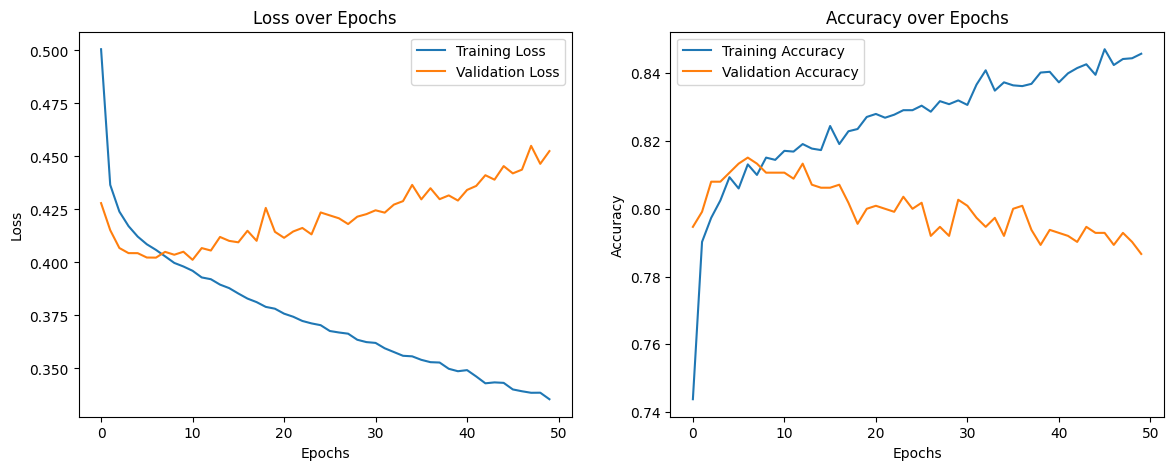

In [ ]:
import matplotlib.pyplot as plt

# Plot loss and accuracy over epochs
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.7782515991471215
F1 Score: 0.5315315315315315

Confusion Matrix:
 [[918 115]
 [197 177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
# Get the same test set in original (unscaled) form
X_raw = df.drop('Churn', axis=1)
X_train_raw, X_test_raw = train_test_split(X_raw, test_size=0.2, random_state=42)

# Add churn probabilities
X_test_raw = X_test_raw.copy()
X_test_raw['Churn_Probability'] = y_pred_proba

# Filter at-risk customers
at_risk_customers = X_test_raw[X_test_raw['Churn_Probability'] >= 0.5]
print("Number of at-risk customers:", at_risk_customers.shape[0])
at_risk_customers.head()


Number of at-risk customers: 292


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability
6125,0,13,102.25,1359.00,True,True,False,True,False,True,...,True,False,True,False,False,True,True,False,False,0.898657
3223,0,3,29.80,94.40,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0.585483
3469,1,15,91.50,1400.30,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,False,0.596348
6578,0,10,73.55,693.30,False,False,True,True,False,True,...,False,False,True,True,False,False,True,False,False,0.514042
1976,1,1,93.55,93.55,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,0.915876


In [ ]:
# Save to file
at_risk_customers.to_csv("at_risk_customers.csv", index=False)

# Optionally download in Colab
from google.colab import files
files.download("at_risk_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

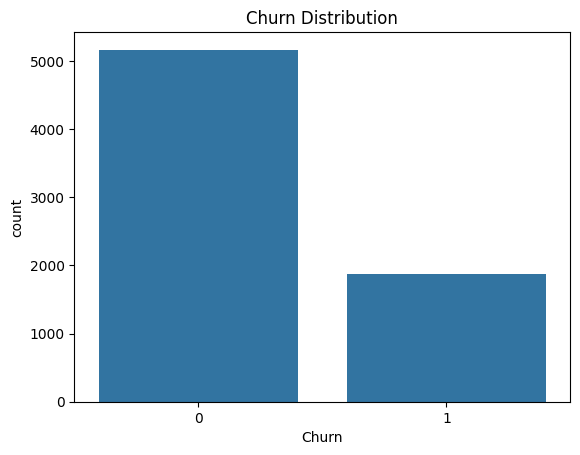

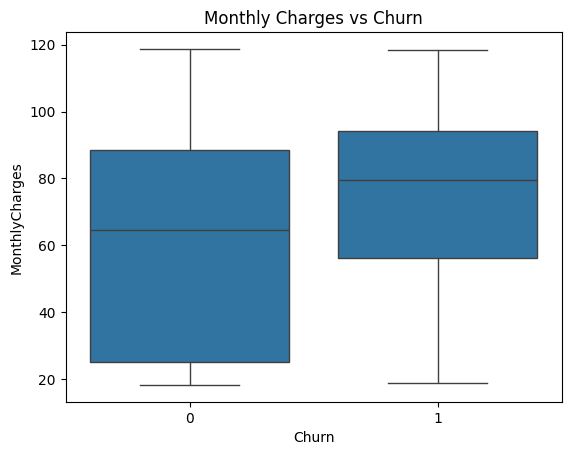

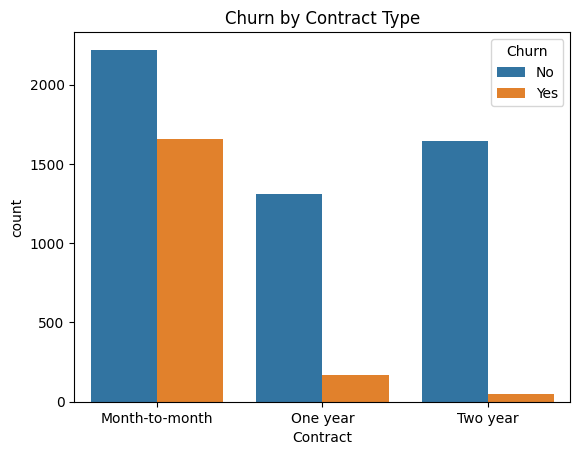

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Monthly charges by churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

# Churn by Contract Type
sns.countplot(data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv'), x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()


In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Train with class weights
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
          class_weight=class_weights, verbose=1)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8271 - loss: 0.4010 - val_accuracy: 0.7698 - val_loss: 0.4804
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8247 - loss: 0.4005 - val_accuracy: 0.7502 - val_loss: 0.5198
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8068 - loss: 0.3949 - val_accuracy: 0.7564 - val_loss: 0.5107
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8230 - loss: 0.3718 - val_accuracy: 0.7600 - val_loss: 0.4992
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8235 - loss: 0.3685 - val_accuracy: 0.7422 - val_loss: 0.5188
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8131 - loss: 0.3860 - val_accuracy: 0.7493 - val_loss: 0.5071
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8275 - loss: 0.3617 - val_accuracy: 0.7476 - val_loss: 0.5038
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.3704 - val_accuracy: 0.

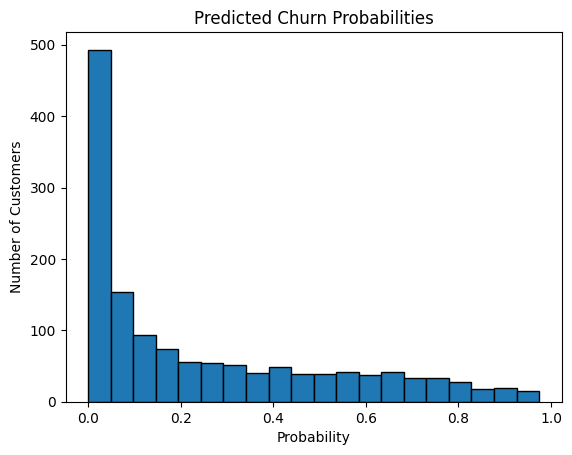

In [ ]:
plt.hist(y_pred_proba, bins=20, edgecolor='black')
plt.title("Predicted Churn Probabilities")
plt.xlabel("Probability")
plt.ylabel("Number of Customers")
plt.show()
